In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('C:/Users/srija/Documents/DS_Predict_TelecomChurn/data/train.csv')
df.columns = df.columns.str.replace(' ', '_')

df.head()

,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,2700-LUEVA,Male,49,No,0,Oakland,94618,37.845510,-122.235181,0,1,NaN,Yes,36.28,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.75,20.75,0.0,0,36.28,57.03,Joined,NaN,NaN
1,2324-EFHVG,Male,37,No,0,Oakland,94609,37.834341,-122.264370,0,64,NaN,Yes,45.82,Yes,Yes,Fiber Optic,14.0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,104.40,6692.65,0.0,0,2932.48,9625.13,Stayed,NaN,NaN
2,8250-ZNGGW,Female,79,No,0,Rio Vista,94571,38.148862,-121.737696,0,5,NaN,Yes,43.99,No,Yes,DSL,27.0,Yes,Yes,No,Yes,No,No,No,No,Two Year,No,Credit Card,59.90,287.85,0.0,20,219.95,527.80,Stayed,NaN,NaN
3,6386-SZZKH,Female,38,Yes,0,San Diego,92126,32.886925,-117.152162,1,49,NaN,Yes,6.45,Yes,Yes,Fiber Optic,10.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,107.95,5293.20,0.0,0,316.05,5609.25,Churned,Competitor,Competitor made better offer
4,4432-ADRLB,Male,46,No,0,Fallbrook,92028,33.362575,-117.299644,0,2,NaN,Yes,24.90,No,Yes,DSL,11.0,No,No,No,No,No,No,No,No,Month-to-Month,No,Mailed Check,44.65,74.90,0.0,10,49.80,134.70,Churned,Competitor,Competitor made better offer


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        5634 non-null   object 
 1   Gender                             5634 non-null   object 
 2   Age                                5634 non-null   int64  
 3   Married                            5634 non-null   object 
 4   Number_of_Dependents               5634 non-null   int64  
 5   City                               5634 non-null   object 
 6   Zip_Code                           5634 non-null   int64  
 7   Latitude                           5634 non-null   float64
 8   Longitude                          5634 non-null   float64
 9   Number_of_Referrals                5634 non-null   int64  
 10  Tenure_in_Months                   5634 non-null   int64  
 11  Offer                              2534 non-null   objec

In [13]:
df.drop(['Customer_ID','City','Zip_Code','Latitude','Longitude','Churn_Category','Churn_Reason'],axis=1,inplace=True)

In [14]:
df['Customer_Status'] = df['Customer_Status'].apply(lambda i:1 if i =='Churned' else 0)

In [15]:
df.head()

,Gender,Age,Married,Number_of_Dependents,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Male,49,No,0,0,1,NaN,Yes,36.28,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Credit Card,20.75,20.75,0.0,0,36.28,57.03,0
1,Male,37,No,0,0,64,NaN,Yes,45.82,Yes,Yes,Fiber Optic,14.0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,104.40,6692.65,0.0,0,2932.48,9625.13,0
2,Female,79,No,0,0,5,NaN,Yes,43.99,No,Yes,DSL,27.0,Yes,Yes,No,Yes,No,No,No,No,Two Year,No,Credit Card,59.90,287.85,0.0,20,219.95,527.80,0
3,Female,38,Yes,0,1,49,NaN,Yes,6.45,Yes,Yes,Fiber Optic,10.0,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,107.95,5293.20,0.0,0,316.05,5609.25,1
4,Male,46,No,0,0,2,NaN,Yes,24.90,No,Yes,DSL,11.0,No,No,No,No,No,No,No,No,Month-to-Month,No,Mailed Check,44.65,74.90,0.0,10,49.80,134.70,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             5634 non-null   object 
 1   Age                                5634 non-null   int64  
 2   Married                            5634 non-null   object 
 3   Number_of_Dependents               5634 non-null   int64  
 4   Number_of_Referrals                5634 non-null   int64  
 5   Tenure_in_Months                   5634 non-null   int64  
 6   Offer                              2534 non-null   object 
 7   Phone_Service                      5634 non-null   object 
 8   Avg_Monthly_Long_Distance_Charges  5070 non-null   float64
 9   Multiple_Lines                     5070 non-null   object 
 10  Internet_Service                   5634 non-null   object 
 11  Internet_Type                      4410 non-null   objec

In [17]:
## train test split

X = df.drop(['Customer_Status'],axis=1)
y = df['Customer_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
y_train.head()

2443    1
1648    1
1168    0
1231    0
2604    1
Name: Customer_Status, dtype: int64

In [19]:
col_with_NaN = [i for i in X_train.columns if (X_train[i].isnull().sum())>0]

In [20]:
col_with_NaN

['Offer',
 'Avg_Monthly_Long_Distance_Charges',
 'Multiple_Lines',
 'Internet_Type',
 'Avg_Monthly_GB_Download',
 'Online_Security',
 'Online_Backup',
 'Device_Protection_Plan',
 'Premium_Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Streaming_Music',
 'Unlimited_Data']

In [21]:
## Simple Imputer for missing values

from sklearn.impute import SimpleImputer

for i in col_with_NaN:
    if X_train[i].dtype=='object':
        si_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        X_train[i] = si_mean.fit_transform(X_train[i].values.reshape(-1,1))[:,0]
    else:
        si_mode = SimpleImputer(missing_values=np.nan, strategy='mean')
        X_train[i] = si_mode.fit_transform(X_train[i].values.reshape(-1,1))[:,0]

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4507 entries, 2443 to 771
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4507 non-null   object 
 1   Age                                4507 non-null   int64  
 2   Married                            4507 non-null   object 
 3   Number_of_Dependents               4507 non-null   int64  
 4   Number_of_Referrals                4507 non-null   int64  
 5   Tenure_in_Months                   4507 non-null   int64  
 6   Offer                              4507 non-null   object 
 7   Phone_Service                      4507 non-null   object 
 8   Avg_Monthly_Long_Distance_Charges  4507 non-null   float64
 9   Multiple_Lines                     4507 non-null   object 
 10  Internet_Service                   4507 non-null   object 
 11  Internet_Type                      4507 non-null   object 


In [23]:
col_with_int = [i for i in X_train.columns if X_train[i].dtype!='object']
col_with_object = [i for i in X_train.columns if X_train[i].dtype=='object']

In [25]:
le = LabelEncoder()

In [26]:
X_train[col_with_object] = X_train[col_with_object].apply(le.fit_transform)

In [27]:
X_train[col_with_object].head()

,Gender,Married,Offer,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method
2443,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,2
1648,1,1,1,1,0,1,1,0,0,0,1,0,0,0,1,0,1,1
1168,0,0,1,1,1,0,2,0,0,0,0,0,0,0,1,2,0,1
1231,1,0,4,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0
2604,0,1,1,1,1,1,2,0,1,1,0,1,0,0,0,0,1,0


In [28]:
X_train.head()

,Gender,Age,Married,Number_of_Dependents,Number_of_Referrals,Tenure_in_Months,Offer,Phone_Service,Avg_Monthly_Long_Distance_Charges,Multiple_Lines,Internet_Service,Internet_Type,Avg_Monthly_GB_Download,Online_Security,Online_Backup,Device_Protection_Plan,Premium_Tech_Support,Streaming_TV,Streaming_Movies,Streaming_Music,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
2443,0,55,1,0,1,42,1,0,25.29879,0,1,0,5.000000,0,1,0,1,0,0,0,0,1,0,2,33.55,1445.30,0.0,50,0.00,1495.30
1648,1,71,1,1,3,1,1,1,8.38000,0,1,1,19.000000,0,0,0,1,0,0,0,1,0,1,1,49.25,49.25,0.0,0,8.38,57.63
1168,0,60,0,0,0,33,1,1,36.50000,1,0,2,26.030975,0,0,0,0,0,0,0,1,2,0,1,25.70,826.10,0.0,0,1204.50,2030.60
1231,1,42,0,0,0,1,4,1,39.87000,1,1,1,2.000000,0,0,0,0,0,0,0,1,0,1,0,50.15,50.15,0.0,0,39.87,90.02
2604,0,67,1,0,1,50,1,1,31.56000,1,1,2,4.000000,0,1,1,0,1,0,0,0,0,1,0,95.05,4888.70,0.0,50,1578.00,6516.70


In [128]:
f_p_values=chi2(X_train[col_with_object],y_train)

In [129]:
f_p_values[1]

array([3.47872522e-001, 1.70099090e-011, 6.94654788e-040, 8.61273511e-001,
       3.43008183e-001, 4.12784048e-013, 1.40722909e-002, 3.97382695e-025,
       2.89443796e-005, 1.68188176e-004, 9.93833510e-023, 1.62418364e-004,
       1.22157268e-004, 9.59519093e-004, 3.96528702e-001, 2.52441424e-176,
       1.39673204e-015, 1.52349005e-015])

In [130]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train[col_with_object].columns
p_values

Gender                     3.478725e-01
Married                    1.700991e-11
Offer                      6.946548e-40
Phone_Service              8.612735e-01
Multiple_Lines             3.430082e-01
Internet_Service           4.127840e-13
Internet_Type              1.407229e-02
Online_Security            3.973827e-25
Online_Backup              2.894438e-05
Device_Protection_Plan     1.681882e-04
Premium_Tech_Support       9.938335e-23
Streaming_TV               1.624184e-04
Streaming_Movies           1.221573e-04
Streaming_Music            9.595191e-04
Unlimited_Data             3.965287e-01
Contract                  2.524414e-176
Paperless_Billing          1.396732e-15
Payment_Method             1.523490e-15
dtype: float64

In [131]:
p_values.sort_index(ascending=False)

Unlimited_Data             3.965287e-01
Streaming_TV               1.624184e-04
Streaming_Music            9.595191e-04
Streaming_Movies           1.221573e-04
Premium_Tech_Support       9.938335e-23
Phone_Service              8.612735e-01
Payment_Method             1.523490e-15
Paperless_Billing          1.396732e-15
Online_Security            3.973827e-25
Online_Backup              2.894438e-05
Offer                      6.946548e-40
Multiple_Lines             3.430082e-01
Married                    1.700991e-11
Internet_Type              1.407229e-02
Internet_Service           4.127840e-13
Gender                     3.478725e-01
Device_Protection_Plan     1.681882e-04
Contract                  2.524414e-176
dtype: float64

### Integers

In [132]:
X_train[col_with_int].head()

,Age,Number_of_Dependents,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
1477,45,2,1,57,41.56,26.091915,19.40,1061.60,0.0,0,2368.92,3430.52
2363,59,0,8,16,46.00,30.000000,80.75,1321.30,0.0,0,736.00,2057.30
5535,34,0,0,4,5.63,18.000000,98.10,396.30,0.0,0,22.52,418.82
43,52,1,0,4,32.15,26.091915,20.40,84.75,0.0,0,128.60,213.35
618,66,0,0,16,22.90,24.000000,69.65,1043.30,0.0,0,366.40,1409.70


In [133]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train[col_with_int], y_train)
mutual_info

array([0.        , 0.04249684, 0.06816617, 0.06631809, 0.0006042 ,
       0.03140748, 0.04082279, 0.05857754, 0.00799042, 0.        ,
       0.05342165, 0.04302117])

In [135]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train[col_with_int].columns
mutual_info.sort_values(ascending=False)

Number_of_Referrals                  0.068166
Tenure_in_Months                     0.066318
Total_Charges                        0.058578
Total_Long_Distance_Charges          0.053422
Total_Revenue                        0.043021
Number_of_Dependents                 0.042497
Monthly_Charge                       0.040823
Avg_Monthly_GB_Download              0.031407
Total_Refunds                        0.007990
Avg_Monthly_Long_Distance_Charges    0.000604
Age                                  0.000000
Total_Extra_Data_Charges             0.000000
dtype: float64

<Axes: >

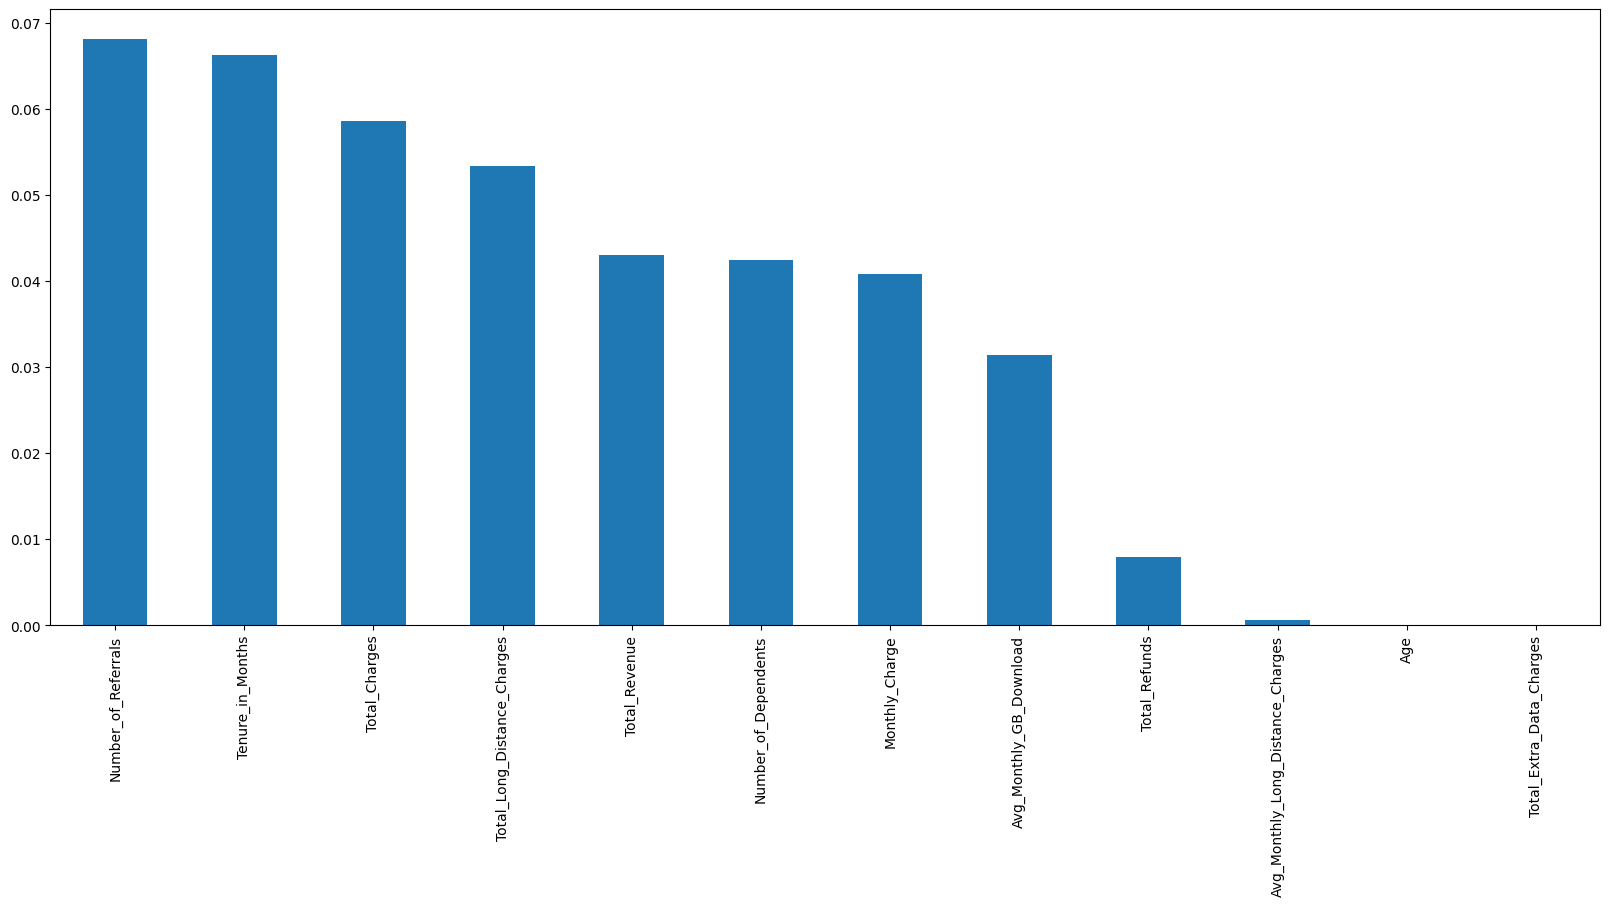

In [136]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [137]:
## We wiil select the top 5 features from categorical and numerical features

X_train = X_train[['Unlimited_Data','Streaming_TV','Streaming_Music','Streaming_Movies','Premium_Tech_Support',
                  'Number_of_Referrals','Tenure_in_Months','Total_Charges','Monthly_Charge','Total_Long_Distance_Charges']]

In [138]:
X_train.head()

,Unlimited_Data,Streaming_TV,Streaming_Music,Streaming_Movies,Premium_Tech_Support,Number_of_Referrals,Tenure_in_Months,Total_Charges,Monthly_Charge,Total_Long_Distance_Charges
1477,1,0,0,0,0,1,57,1061.60,19.40,2368.92
2363,1,0,0,0,0,8,16,1321.30,80.75,736.00
5535,1,1,1,1,1,0,4,396.30,98.10,22.52
43,1,0,0,0,0,0,4,84.75,20.40,128.60
618,1,0,0,0,0,0,16,1043.30,69.65,366.40


In [139]:
X_train.shape

(4507, 10)

In [140]:
y_train.head()

1477    0
2363    0
5535    1
43      0
618     0
Name: Customer_Status, dtype: int64

In [141]:
len(y_train)

4507

In [144]:
df_training_data = pd.concat([X_train,y_train],axis=1)

In [145]:
df_training_data.to_csv('C:/Users/srija/Documents/DS_Predict_TelecomChurn/data/training_data.csv',index=False)